# Project Name

Team:
1. Renee Dhanaraj
2. Aditi Verma
3. Chris Park
4. Aryan Ahuja

In [127]:
# sklearn imports
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

# data manipulation imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


## Importing dataset

In [128]:
original_dataset_df = pd.read_csv('dataset/dataset.csv')
original_dataset_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning

In [129]:
# creating a copy to clean to avoid contamination of original data
df = original_dataset_df.copy()

In [130]:
# information about the dataset, such as number of entries, column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [131]:
# getting the summary statistics of the dataset (of numerical features)
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [132]:
# checking for missing values in each column
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [133]:
# dropping all the rows with any missing/null values since there are very few
df = df.dropna()

# dropping unnecessary columns that won't help in prediction like id
df = df.drop(columns=["Unnamed: 0", "track_id"])

# IF WE PLAN TO NOT USE NLP FOR NATURAL LANGUAGE PROCESSING, UNCOMMENT AND DROP TEXT COLUMNS
# df = df.drop(columns=["artists", "album_name", "track_name", "track_genre"])

# making sure the "explicit" column is of type integer and not boolean
df["explicit"] = df["explicit"].astype(int)

In [134]:
# sanity checks for the important numeric columns
print("Popularity range:", df["popularity"].min(), "to", df["popularity"].max())
print("Duration range (ms):", df["duration_ms"].min(), "to", df["duration_ms"].max())
print("Tempo range:", df["tempo"].min(), "to", df["tempo"].max())
print("Loudness range:", df["loudness"].min(), "to", df["loudness"].max())

# duplicate check
duplicates_mask = df.duplicated(subset=["artists", "album_name", "track_name"])
print("Number of duplicate entries based on artists, album_name, track_name:", duplicates_mask.sum())


Popularity range: 0 to 100
Duration range (ms): 8586 to 5237295
Tempo range: 0.0 to 243.372
Loudness range: -49.531 to 4.532
Number of duplicate entries based on artists, album_name, track_name: 24620


In [135]:
# sanity checks for categorical columns
print("Explicit values:", df["explicit"].value_counts())
print("\nMode values:", df["mode"].value_counts())
print("\nTime signature values:", df["time_signature"].value_counts())
print("\nKey values:", df["key"].value_counts().sort_index())



Explicit values: explicit
0    104252
1      9747
Name: count, dtype: int64

Mode values: mode
1    72681
0    41318
Name: count, dtype: int64

Time signature values: time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

Key values: key
0     13061
1     10772
2     11644
3      3570
4      9008
5      9368
6      7921
7     13244
8      7360
9     11313
10     7456
11     9282
Name: count, dtype: int64


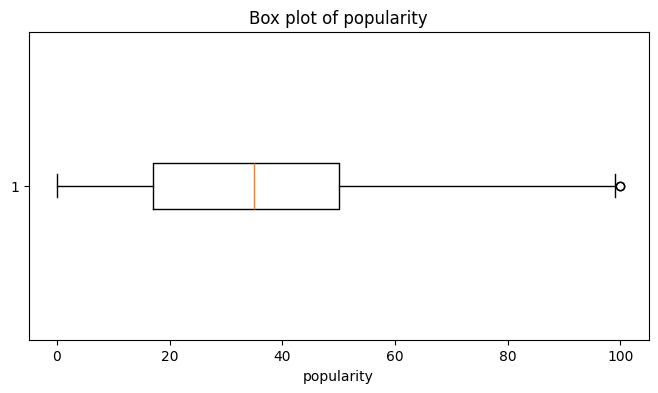

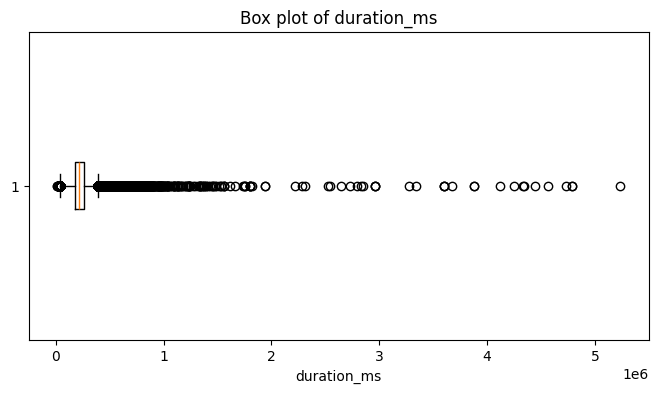

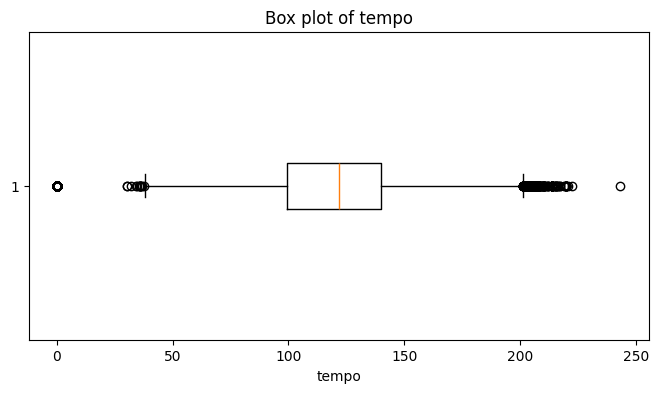

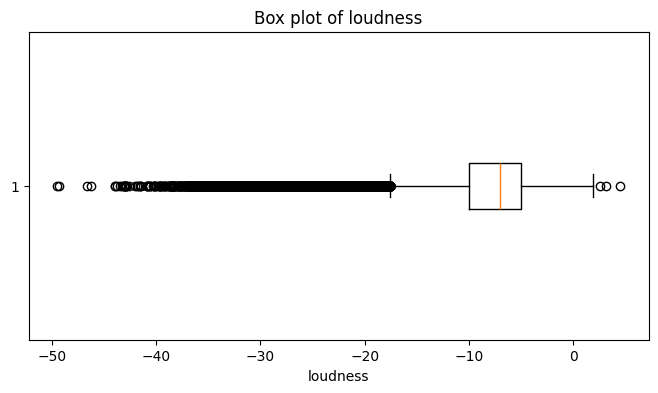

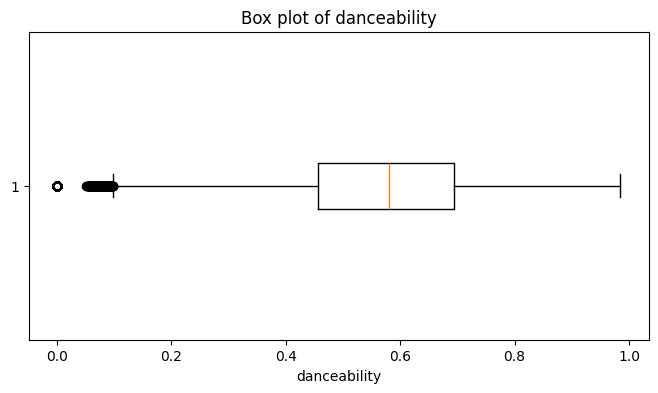

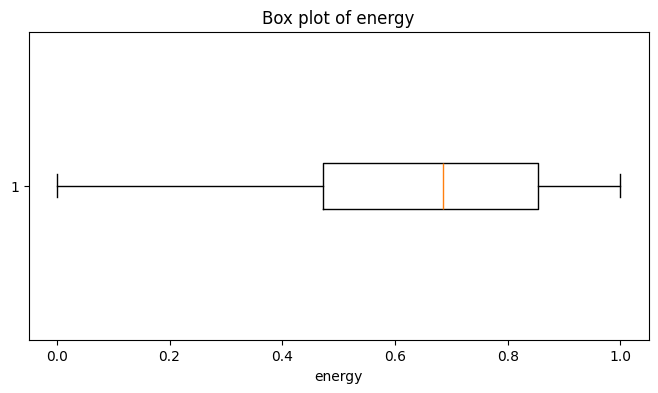

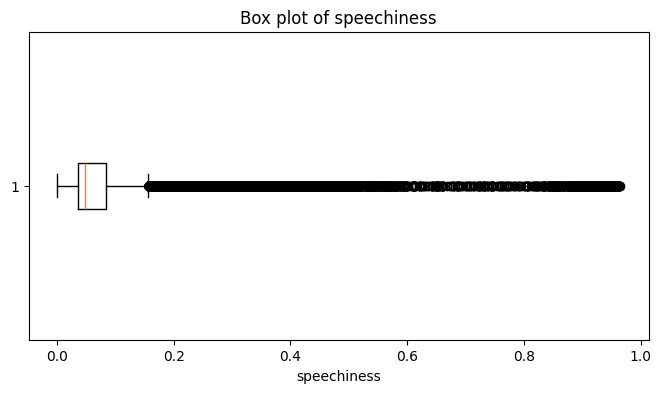

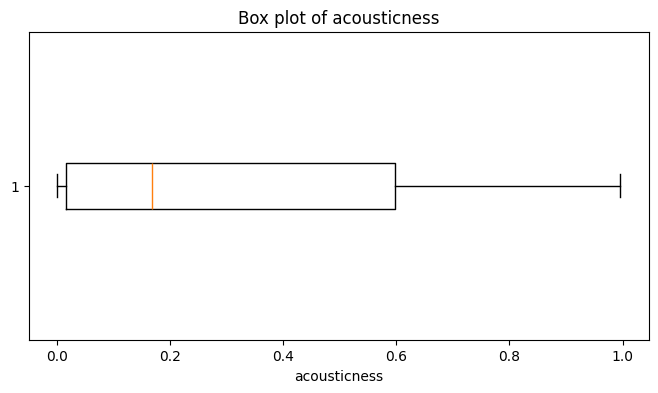

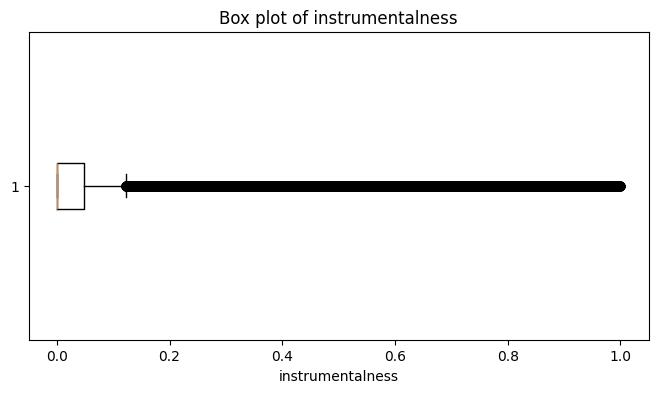

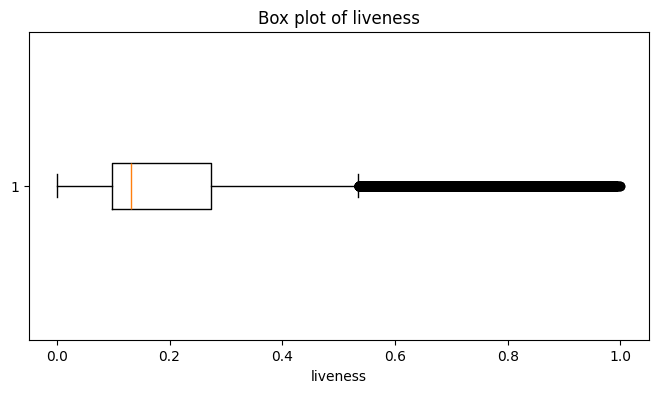

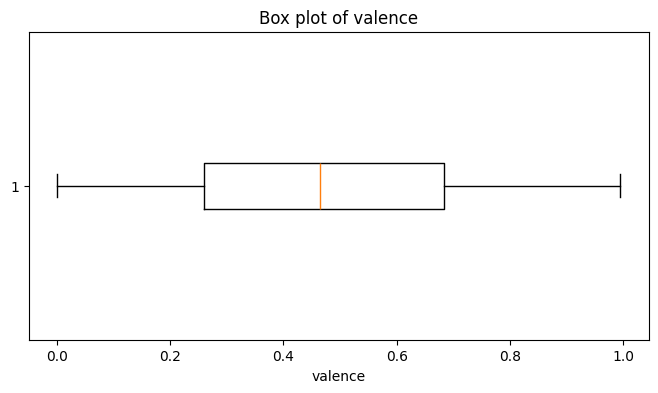

In [136]:
# checking for outliers in numerical columns using box plots
numerical_columns = ["popularity", "duration_ms", "tempo", "loudness", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# We can see that some features are skewer, but if we train models like XGBoost, for ensemble methods, we need not do any transformations
# There are some outliers as well, but we still need to keep them since they are real songs and removing them would lead to loss of information
# Hence, we will not be doing any outlier removal or transformations for skewness at this point

# If required for training (linear models or nerual networks), we can always do log transformations or apply standardization/normalization later

In [137]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [138]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Exploratory Data Analysis (EDA)

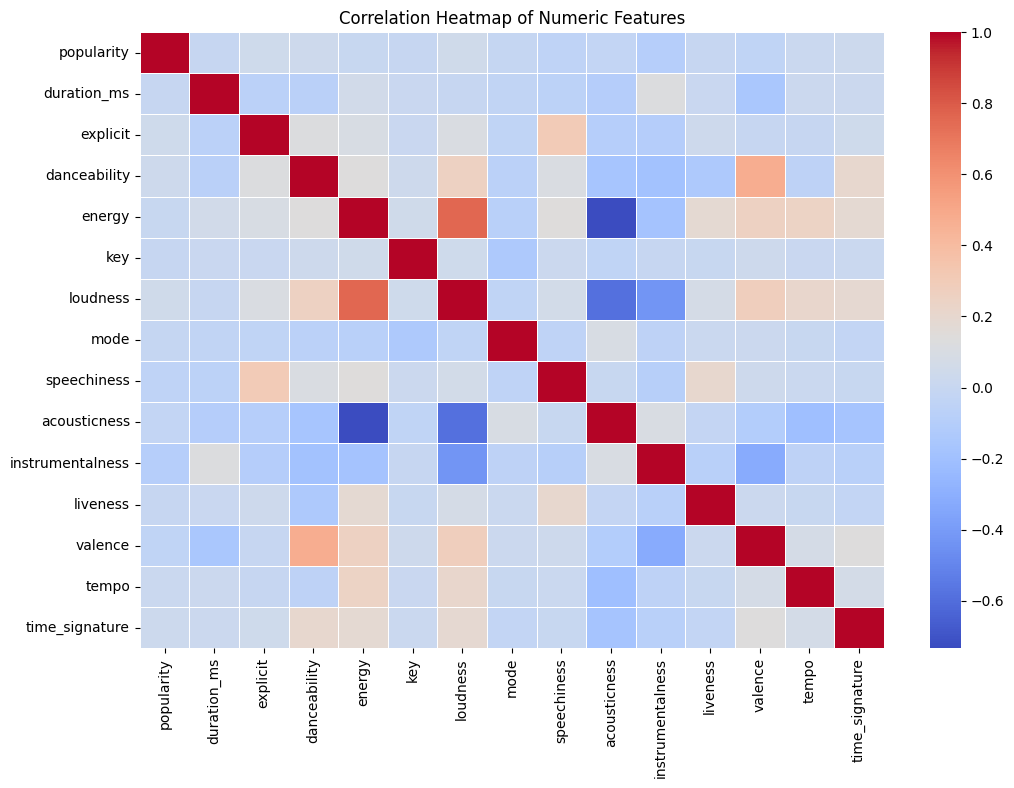

' OBSERVATIONS:\nGenerally a lot more negative corrolation than positive ones.\n\nSong Type\n    Negative corrolation: \n        energy + acousticness\n        loudness + acousticness\n        loudness + instrumentalness\n        valence + instrumentalness\n\n    Positive corrolation:\n        loudness + energy\n        loudness + danceability\n        danceability + valence\n        energy + valence\n        speechiness + explicit\n\nPopularity\n    Negative corrolation:\n        popularity + instrumentalness\n        popularity + duration_ms\n\n    No positive corrolation :((\n'

In [139]:
#attempt visualizing a headmap 
#use only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#compute correlation matrix
corr = numeric_df.corr()

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

""" OBSERVATIONS:
Generally a lot more negative corrolation than positive ones.

Song Type
    Negative corrolation: 
        energy + acousticness
        loudness + acousticness
        loudness + instrumentalness
        valence + instrumentalness
    
    Positive corrolation:
        loudness + energy
        loudness + danceability
        danceability + valence
        energy + valence
        speechiness + explicit

Popularity
    Negative corrolation:
        popularity + instrumentalness
        popularity + duration_ms

    No positive corrolation :((
"""

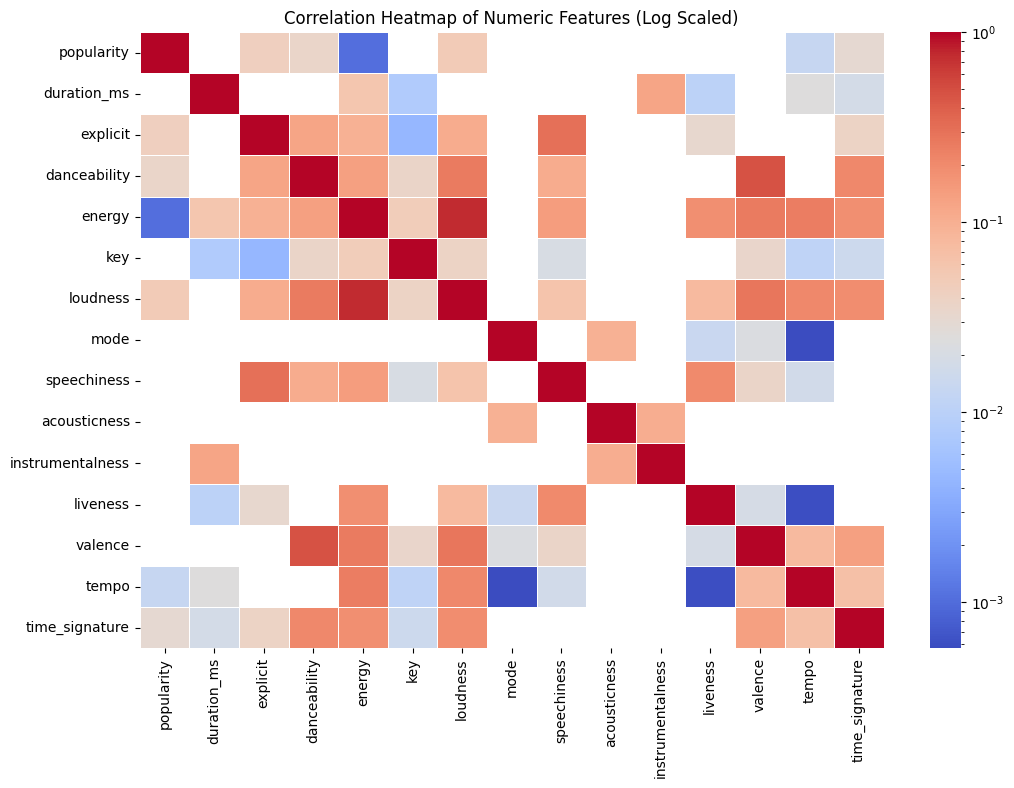

' OBSERVATIONS:\nGenerally a lot more positive corrolations\n\nPopularity\n    Negative corrolation:\n        energy\n        tempo\n\n    Positive corrolation:\n        explicit\n        danceability\n        loudness\n        time_signature\n'

In [140]:
# Try normalizing using log_scale to address highly skewed datasets
plt.figure(figsize=(12, 8))
sns.heatmap(corr, norm=mcolors.LogNorm(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (Log Scaled)")
plt.show()

""" OBSERVATIONS:
Generally a lot more positive corrolations

Popularity
    Negative corrolation:
        energy
        tempo

    Positive corrolation:
        explicit
        danceability
        loudness
        time_signature
"""
# dig deeper into the significant corrolations

##### More EDA that is related to popularity

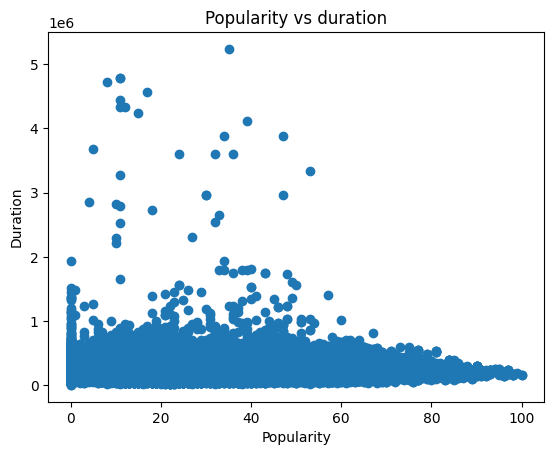

In [141]:
plt.scatter(df["popularity"], df["duration_ms"])
plt.xlabel("Popularity")
plt.ylabel("Duration")
plt.title("Popularity vs duration")
plt.show()
# df["duration"]

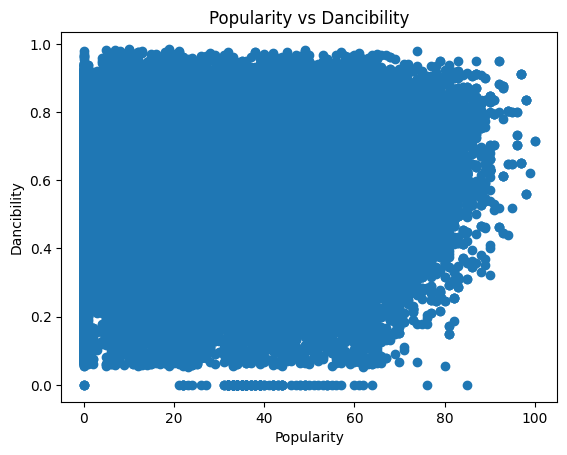

In [142]:
plt.scatter(df["popularity"], df["danceability"])
plt.xlabel("Popularity")
plt.ylabel("Dancibility")
plt.title("Popularity vs Dancibility")
plt.show()


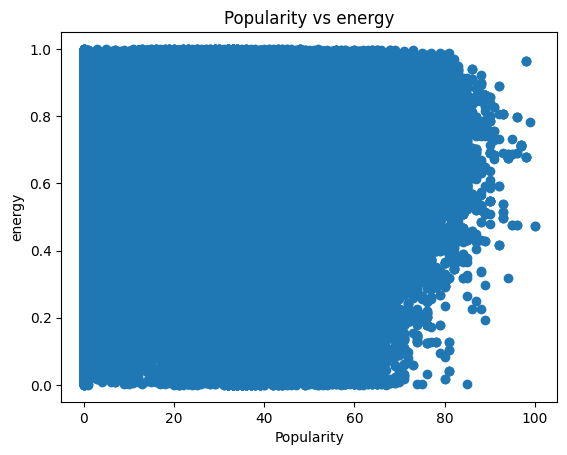

In [143]:
plt.scatter(df["popularity"], df["energy"])
plt.xlabel("Popularity")
plt.ylabel("energy")
plt.title("Popularity vs energy")
plt.show()

Text(0.5, 1.0, 'Acustic distribution for songs with >50 popularity')

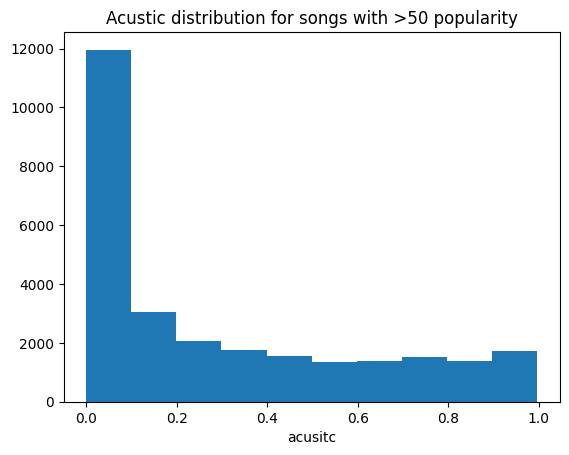

In [144]:
popular_songs = df[df.popularity > 50]
plt.hist(popular_songs["acousticness"])
plt.xlabel("acusitc")
plt.title("Acustic distribution for songs with >50 popularity")

Text(0.5, 1.0, 'danceability distribution for songs with > 0.7 dancability')

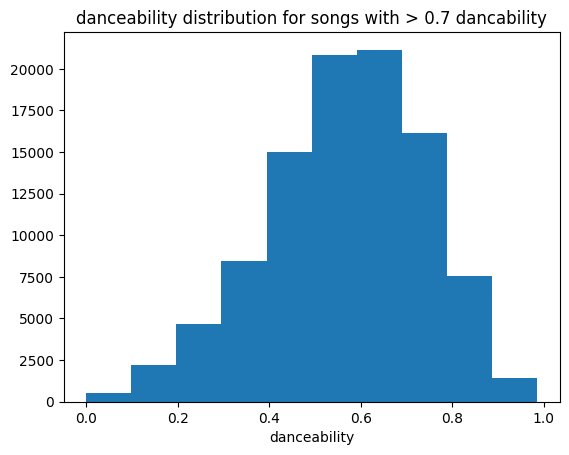

In [145]:
popular_songs = df[df.popularity > 0.7]
plt.hist(popular_songs["danceability"])
plt.xlabel("danceability")
plt.title("danceability distribution for songs with > 0.7 dancability")

C:\Users\aryan\AppData\Local\Temp\ipykernel_21200\4226924672.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values="popularity", index="danceability_q", columns="energy_q", aggfunc="mean")


<Axes: xlabel='energy_q', ylabel='danceability_q'>

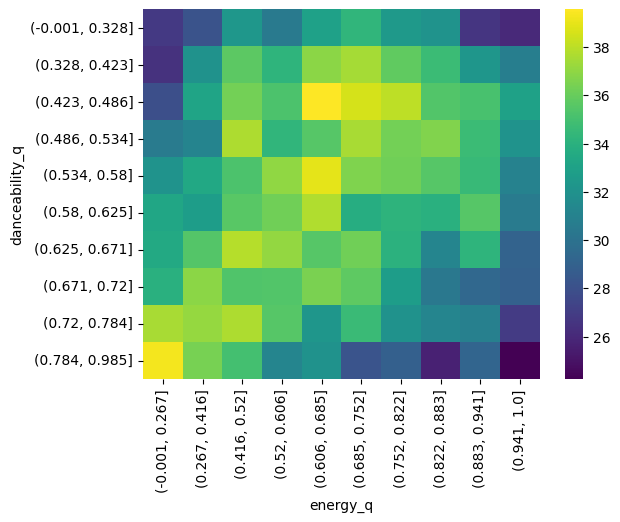

In [146]:
df["energy_q"] = pd.qcut(df["energy"], 10)
df["danceability_q"] = pd.qcut(df["danceability"], 10)
pivot = df.pivot_table(values="popularity", index="danceability_q", columns="energy_q", aggfunc="mean")
sns.heatmap(pivot, cmap="viridis")

In [147]:
#Average popularity per artist
artist_pop = df.groupby("artists")["popularity"].mean()


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  object  
 1   album_name        113999 non-null  object  
 2   track_name        113999 non-null  object  
 3   popularity        113999 non-null  int64   
 4   duration_ms       113999 non-null  int64   
 5   explicit          113999 non-null  int64   
 6   danceability      113999 non-null  float64 
 7   energy            113999 non-null  float64 
 8   key               113999 non-null  int64   
 9   loudness          113999 non-null  float64 
 10  mode              113999 non-null  int64   
 11  speechiness       113999 non-null  float64 
 12  acousticness      113999 non-null  float64 
 13  instrumentalness  113999 non-null  float64 
 14  liveness          113999 non-null  float64 
 15  valence           113999 non-null  float64 
 16  tempo  

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, balanced_accuracy_score, confusion_matrix
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from typing import List

import pandas as pd
import numpy as np

import torch

In [ ]:
# helper functions to preprocess the data
def get_X_y(df: pd.DataFrame, 
            target_columns: List[str]):
    """
    Splits the dataframe into features and target
    """
    X = df.drop(columns=target_columns)
    y = df[target_columns]
    return X, y


def make_popularity_classes(popularity_series: pd.Series):
    """
    Converts a popularity series into discrete classes
    """
    return (popularity_series >= 50).astype(int)


def encode_data(X_train: pd.DataFrame,
                X_val: pd.DataFrame,
                X_test: pd.DataFrame,
                numerical_columns: List[str],
                feature_encode_cols: List[str],
                onehot_encode_cols: List[str]):
    """
    Encodes the data using frequency encoding, one hot encoding and standard scaling.
    This function acts as a pipeline to fit and transform the data so you don't have to call fit and transform separately.
    """
    # we need to make sure to fit the different encoders on the training data only
    # this avoids data leakage from test and validation sets
    frequency_map, ohe, scaler = _fit_encoders(
        X_train, numerical_columns, feature_encode_cols, onehot_encode_cols
    )

    # once fitted, we can transform the train, validation, and test sets
    X_train_encoded = _transform_features(
        X_train, 
        numerical_columns, feature_encode_cols, onehot_encode_cols,
        frequency_map, ohe, scaler
    )
    X_val_encoded = _transform_features(
        X_val,
        numerical_columns, feature_encode_cols, onehot_encode_cols,
        frequency_map, ohe, scaler
    )
    X_test_encoded = _transform_features(
        X_test, 
        numerical_columns, feature_encode_cols, onehot_encode_cols,
        frequency_map, ohe, scaler
    )

    return X_train_encoded, X_val_encoded, X_test_encoded, frequency_map, ohe, scaler


def _fit_encoders(X_train: pd.DataFrame,
                 numerical_columns: List[str],
                 feature_encode_cols: List[str],
                 onehot_encode_cols: List[str]):
    """
    PRIVATE HELPER FUNCTION

    Fits the encoders for numerical and categorical features
    """
    # frequency mapping for frequency encoding categorical features
    frequency_map = {}
    for col in feature_encode_cols:
        frquency = X_train[col].value_counts(normalize=True) # get frequency of each category as proportion
        frequency_map[col] = frquency.to_dict()

    # one hot encoding the necessary columns
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    ohe.fit(X_train[onehot_encode_cols])

    # standard scaling the numerical columns for neural networks or linear models
    scaler = StandardScaler()
    scaler.fit(X_train[numerical_columns])

    return frequency_map, ohe, scaler


def _transform_features(X: pd.DataFrame,
                       numerical_columns: List[str],
                       feature_encode_cols: List[str],
                       onehot_encode_cols: List[str],
                       frequency_map: dict,
                       ohe: OneHotEncoder,
                       scaler: StandardScaler):
    """
    PRIVATE HELPER FUNCTION

    Transforms the features using the fitted encoders
    """
    # scaling numerical columns
    X_std_scaled = scaler.transform(X[numerical_columns])

    # transoforming frequency encoded columns
    frequency_features = []
    for col in feature_encode_cols:
        frequency_map_col = frequency_map[col]
        encoded_col = X[col].map(frequency_map_col).fillna(0).values.reshape(-1, 1)
        frequency_features.append(encoded_col)
    X_frequency_encoded = np.hstack(frequency_features) if frequency_features else np.empty((X.shape[0], 0))

    # transforming one hot encoded columns
    X_onehot_encoded = ohe.transform(X[onehot_encode_cols]) if onehot_encode_cols else np.empty((X.shape[0], 0))

    # combining all features together
    x = np.hstack([X_std_scaled, X_frequency_encoded, X_onehot_encoded])
    return x


def compute_classification_metrics(y_true, y_pred):
    """
    Computes precision, recall and balanced accuracy scores
    """
    avg = "binary"
    precision = precision_score(y_true, y_pred, average=avg, zero_division=0)
    recall = recall_score(y_true, y_pred, average=avg, zero_division=0)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    return precision, recall, bal_acc

In [151]:
# will encode Artist name: Feature encoding
# will encode Track genre: One hot encoding
# will drop Album/track names
# rest are numeric columns
cols_to_drop = ["album_name", "track_name"]
feature_encode_cols = ["artists"]
onehot_encode_cols = ["track_genre"]
numerical_columns = [
    "duration_ms", "explicit", "danceability", "energy", "key",
    "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo", "time_signature",
]

In [ ]:
"""
PROCESSING DATA BEFORE MODEL TRAINING

1. Get X and y datasets
2. Transform popularity into classes
3. Split into train, validation, and test sets
4. Encode and scale the data (look at helper functions above)
"""
from sklearn.utils.class_weight import compute_class_weight

# getting X and y datasets
X, y = get_X_y(df, target_columns="popularity")

# transforming popularity into classes
y = make_popularity_classes(y)

# splitting into train test splits
x_train_full, x_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# further split train into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1765, stratify=y_train_full, random_state=42
)





train_df = x_train.copy()
train_df["target"] = y_train.values

# split by class
df_majority = train_df[train_df["target"] == 0]
df_minority = train_df[train_df["target"] == 1]

print("Before undersampling:")
print("  majority (0):", len(df_majority))
print("  minority (1):", len(df_minority))

# downsample majority class
keep_factor = 0.5
n_majority_keep = int(len(df_majority) * keep_factor)

df_majority_down = df_majority.sample(
    n=n_majority_keep,
    random_state=42
)

# combine and shuffle
df_down = pd.concat([df_majority_down, df_minority], axis=0)
df_down = df_down.sample(frac=1.0, random_state=42).reset_index(drop=True)

# new balanced-ish train X / y
x_train = df_down.drop(columns=["target"])
y_train = df_down["target"].values

print("After undersampling:")
print("  majority (0):", (y_train == 0).sum())
print("  minority (1):", (y_train == 1).sum())






# encoding and scaling the data
X_train_encoded, X_val_encoded, X_test_encoded, frequency_map, ohe, scaler = encode_data(
    x_train, x_val, x_test,
    numerical_columns,
    feature_encode_cols,
    onehot_encode_cols
)

Before undersampling:
  majority (0): 59240
  minority (1): 20556
After undersampling:
  majority (0): 29620
  minority (1): 20556


In [189]:
"""
DEFINING A BASE MODEL TO COMPARE MY MODEL AGAINST

BASE MODEL: LOGISTIC REGRESSION
"""
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    r2_score,
    mean_squared_error
)
import numpy as np

model = LogisticRegression(
    max_iter=5000,
    multi_class="auto",
    solver="lbfgs",
    n_jobs=-1,
    random_state=42
)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(
    model,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# starting grid search
grid_search.fit(X_train_encoded, y_train)

# post training
print("Best hyperparameters:", grid_search.best_params_)
best_lr_model = grid_search.best_estimator_

# validation set evaluation
y_val_pred = best_lr_model.predict(X_val_encoded)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="binary")

# including r2 and rmse for... classification metrics?
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")

print("\nValidation Report:")
print(classification_report(y_val, y_val_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\aryan\Desktop\assignment2\spotify_predictions\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best hyperparameters: {'C': 10, 'class_weight': 'balanced'}

Validation Accuracy: 0.7089
Validation F1 Score: 0.5769

Validation Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     12697
           1       0.46      0.77      0.58      4406

    accuracy                           0.71     17103
   macro avg       0.68      0.73      0.68     17103
weighted avg       0.78      0.71      0.73     17103



In [209]:
# ensuring reproducibility
torch.manual_seed(42)
np.random.seed(42)

# setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# making a dataset class
class SongDataset(Dataset):
    def __init__(self, X, y):
        self.X = np.asarray(X, dtype=np.float32)
        self.y = np.asarray(y, dtype=np.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        return x, y

# create datasets from your encoded splits
train_ds = SongDataset(X_train_encoded, y_train)
val_ds   = SongDataset(X_val_encoded,   y_val)
test_ds  = SongDataset(X_test_encoded,  y_test)

BATCH_SIZE = 4096

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False)

# defining the model
input_dim  = X_train_encoded.shape[1]
output_dim = 1

class PopularityMLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer11 = nn.Linear(input_dim, 4096)
        self.batch_norm11   = nn.BatchNorm1d(4096)
        self.relu11         = nn.LeakyReLU()

        self.linear_layer12 = nn.Linear(4096, 2048)
        self.batch_norm12   = nn.BatchNorm1d(2048)
        self.relu12         = nn.LeakyReLU()

        self.linear_layer0 = nn.Linear(2048, 1024)
        self.batch_norm0   = nn.BatchNorm1d(1024)
        self.relu0         = nn.LeakyReLU()

        self.linear_layer1 = nn.Linear(1024, 512)
        self.batch_norm1   = nn.BatchNorm1d(512)
        self.relu1         = nn.LeakyReLU()

        self.linear_layer2 = nn.Linear(512, 256)
        self.batch_norm2   = nn.BatchNorm1d(256)
        self.relu2         = nn.LeakyReLU()

        self.linear_layer3 = nn.Linear(256, 128)
        self.batch_norm3   = nn.BatchNorm1d(128)
        self.relu3         = nn.LeakyReLU()

        # self.linear_layer4 = nn.Linear(128, 64)
        # self.batch_norm4   = nn.BatchNorm1d(64)
        # self.relu4         = nn.LeakyReLU()

        # self.linear_layer5 = nn.Linear(64, 32)
        # self.batch_norm5   = nn.BatchNorm1d(32)
        # self.relu5         = nn.LeakyReLU()

        self.out = nn.Linear(128, output_dim)

        self.drop = nn.Dropout(0.3)

    def forward(self, x):

        x = self.linear_layer11(x)
        x = self.batch_norm11(x)
        x = self.relu11(x)
        x = self.drop(x)

        x = self.linear_layer12(x)
        x = self.batch_norm12(x)
        x = self.relu12(x)
        x = self.drop(x)

        x = self.linear_layer0(x)
        x = self.batch_norm0(x)
        x = self.relu0(x)
        x = self.drop(x)
        # x = nn.Dropout(0.3)(x)

        x = self.linear_layer1(x)
        x = self.batch_norm1(x)
        x = self.relu1(x)

        x = self.linear_layer2(x)
        x = self.batch_norm2(x)
        x = self.relu2(x)

        x = self.linear_layer3(x)
        x = self.batch_norm3(x)
        x = self.relu3(x)

        # x = self.linear_layer4(x)
        # x = self.batch_norm4(x)
        # x = self.relu4(x)

        # x = self.linear_layer5(x)
        # x = self.batch_norm5(x)
        # x = self.relu5(x)

        # output (no activation here for BCEWithLogitsLoss)
        return self.out(x)

model = PopularityMLP().to(device)



# loss function, optimizer, scheduler
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=3e-3,
    weight_decay=1e-3,
    betas=(0.9, 0.999)
)

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=2, eta_min=1e-6
)


# epoch runner
def run_epoch(loader, model, criterion, optimizer=None, scheduler=None):
    """
    If optimizer is provided -> training mode
    If optimizer is None -> evaluation mode
    """
    if optimizer is None:
        model.eval()
    else:
        model.train()

    all_labels = []
    all_preds  = []
    running_loss = 0.0
    total_batches = 0

    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)

        if optimizer is not None:
            optimizer.zero_grad()

        with torch.set_grad_enabled(optimizer is not None):
            logits = model(xb)

            yb_float = yb.float().unsqueeze(1)
            loss = criterion(logits, yb_float)
            probs = torch.sigmoid(logits)
            preds = (probs >= 0.5).long().squeeze(1)

        if optimizer is not None:
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

        running_loss += loss.item()
        total_batches += 1

        all_labels.append(yb.detach().cpu())
        all_preds.append(preds.detach().cpu())

    avg_loss = running_loss / total_batches
    all_labels = torch.cat(all_labels).numpy()
    all_preds  = torch.cat(all_preds).numpy()

    f1 = f1_score(all_labels, all_preds, average="binary")
    acc = accuracy_score(all_labels, all_preds)

    return avg_loss, acc, f1, all_labels, all_preds


# training loop
EPOCHS = 150
PATIENCE = 500  # early stopping patience

best_val_f1 = -1.0
best_state  = None
patience_counter = 0

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        train_loader, model, criterion, optimizer, scheduler
    )
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        val_loader, model, criterion, optimizer=None
    )
    
    # Step scheduler once per epoch
    scheduler.step()

    # Early stopping logic (by val F1; switch to val_acc if you prefer)
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    if epoch % 50 == 0 or epoch == EPOCHS:
        print(
            f"Epoch {epoch:03d} | "
            f"train_loss={train_loss:.4f} acc={train_acc:.4f} f1={train_f1:.4f} | "
            f"val_loss={val_loss:.4f} acc={val_acc:.4f} f1={val_f1:.4f} | "
            f"lr={optimizer.param_groups[0]['lr']:.6f}"
        )
    
    if patience_counter >= PATIENCE:
        print(f"\nEarly stopping at epoch {epoch}")
        break

if best_state is not None:
    model.load_state_dict(best_state)
    print(f"\nLoaded best model with val F1 = {best_val_f1:.4f}")

# final evaluation on train, val, and test sets

train_loss, train_acc, train_f1, y_train_true, y_train_pred = run_epoch(
    train_loader, model, criterion, optimizer=None
)
val_loss, val_acc, val_f1, y_val_true, y_val_pred = run_epoch(
    val_loader, model, criterion, optimizer=None
)
test_loss, test_acc, test_f1, y_test_true, y_test_pred = run_epoch(
    test_loader, model, criterion, optimizer=None
)

train_prec, train_rec, train_bal_acc = compute_classification_metrics(
    y_train_true, y_train_pred
)
val_prec, val_rec, val_bal_acc = compute_classification_metrics(
    y_val_true, y_val_pred
)
test_prec, test_rec, test_bal_acc = compute_classification_metrics(
    y_test_true, y_test_pred
)

print("\nFinal train/test/val metrics which include precision, recall, balanced accuracy")
print(f"Train: loss={train_loss:.4f} acc={train_acc:.4f} f1={train_f1:.4f} "
      f"prec={train_prec:.4f} rec={train_rec:.4f} bal_acc={train_bal_acc:.4f} ")
print(f"Val:   loss={val_loss:.4f} acc={val_acc:.4f} f1={val_f1:.4f} "
      f"prec={val_prec:.4f} rec={val_rec:.4f} bal_acc={val_bal_acc:.4f} ")
print(f"Test:  loss={test_loss:.4f} acc={test_acc:.4f} f1={test_f1:.4f} "
      f"prec={test_prec:.4f} rec={test_rec:.4f} bal_acc={test_bal_acc:.4f} ")

print("\npytorch MLP test performance")
print(f"test loss: {test_loss:.4f}")
print(f"test accuracy: {test_acc:.4f}")
print(f"test f1 (binary): {test_f1:.4f}")

print("\nclassification report (test dataset):")
print(classification_report(y_test_true, y_test_pred, digits=4))

print("confusion matrix (test dataset):")
print(confusion_matrix(y_test_true, y_test_pred))


Using device: cuda
Epoch 050 | train_loss=0.2744 acc=0.8753 f1=0.8473 | val_loss=0.5930 acc=0.7621 f1=0.6005 | lr=0.001500
Epoch 100 | train_loss=0.1663 acc=0.9292 f1=0.9135 | val_loss=0.8049 acc=0.7609 f1=0.5937 | lr=0.002074
Epoch 150 | train_loss=0.0683 acc=0.9713 f1=0.9649 | val_loss=1.1854 acc=0.7624 f1=0.5959 | lr=0.003000

Loaded best model with val F1 = 0.6074

Final train/test/val metrics which include precision, recall, balanced accuracy
Train: loss=0.0340 acc=0.9852 f1=0.9818 prec=0.9886 rec=0.9751 bal_acc=0.9836 
Val:   loss=1.1854 acc=0.7624 f1=0.5959 prec=0.5303 rec=0.6800 bal_acc=0.7355 
Test:  loss=1.1922 acc=0.7640 f1=0.5974 prec=0.5329 rec=0.6797 bal_acc=0.7365 

pytorch MLP test performance
test loss: 1.1922
test accuracy: 0.7640
test f1 (binary): 0.5974

classification report (test dataset):
              precision    recall  f1-score   support

           0     0.8771    0.7933    0.8331     12695
           1     0.5329    0.6797    0.5974      4405

    accuracy 

## Model Evaluation